### Imports

In [1]:
from ActiveTestingRegressionMV import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

### Synthetic Nonlinear 1D Data

In [2]:
rng = np.random.RandomState(2)

N = 60
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = np.sort(rng.rand(N) * len_data - len_data / 2)
noise = rng.randn(N) * 0.1
target = data ** 3 - 0.5 * data ** 2 +  noise

X, y = data, target 

# D_train and D_test
X_train, X_test, y_train, y_test = train_test_split(
    X[:,np.newaxis], y, test_size=0.5, random_state=15) # 11

# learner  
reg_learner = Pipeline([
            ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
            ("std", StandardScaler()),
            ("linear_regression", Ridge())])


reg_learner.fit(X_train, y_train)

y_pred = reg_learner.predict(X_test)

X_new = np.linspace(-1.3,1.3,100)

### Regression NN (No Dropout)

Trial 30 Complete [00h 00m 02s]
mean_squared_error: 0.2684544622898102

Best mean_squared_error So Far: 0.22667889297008514
Total elapsed time: 00h 00m 53s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               512       
                                                                 
 dense_8 (Dense)             (None, 320)               82240     
                                                                 
 dense_9 (Dense)             (None, 448)               143808    
                                                                 
 dense_10 (Dense)            (None, 32)                14368     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 240961 (941.25 K

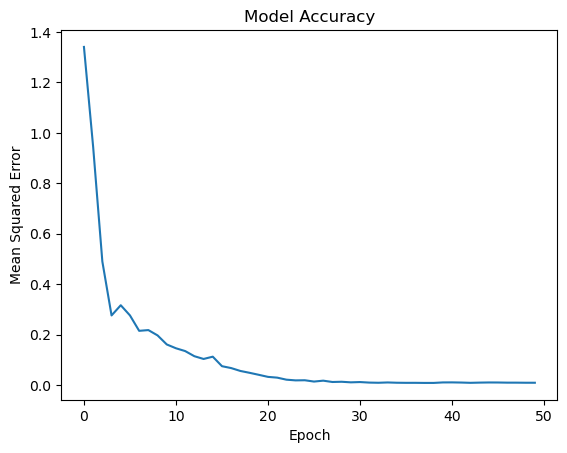

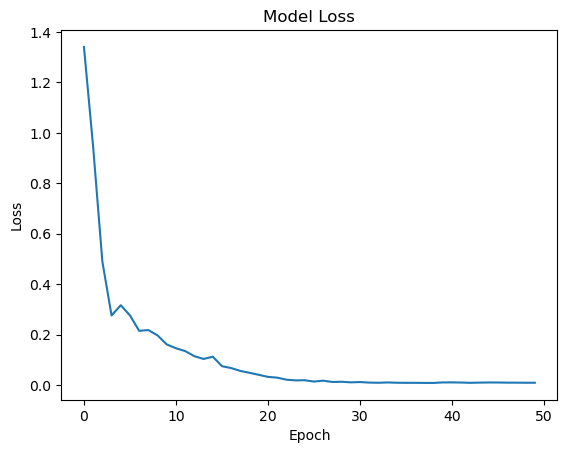

In [3]:
# Tune for data using gridsearch and create model
reg_evaluator = create_model(X_train, y_train, model_type = "boot", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Bootstrap Regression NN

1/1 [==============================] - 0s 13ms/step


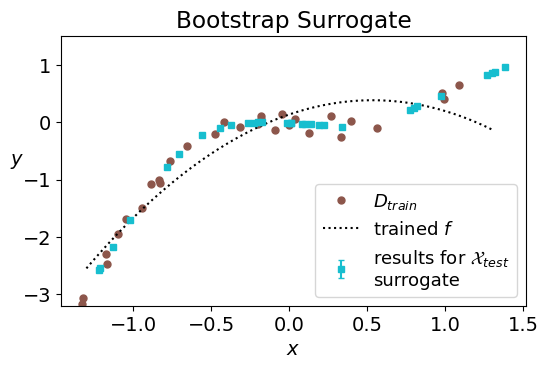

In [4]:
plot_1D(X_train, y_train, X_test, X_new, reg_evaluator, reg_learner, n_reps = 30, model_type ="boot", plot_type="Bootstrap")

### Bootstrap Surrogate Sampling

---3---
1/1 [==============================] - 0s 16ms/step
---6---
1/1 [==============================] - 0s 16ms/step
---9---
1/1 [==============================] - 0s 18ms/step
---12---
1/1 [==============================] - 0s 16ms/step
---15---
1/1 [==============================] - 0s 11ms/step


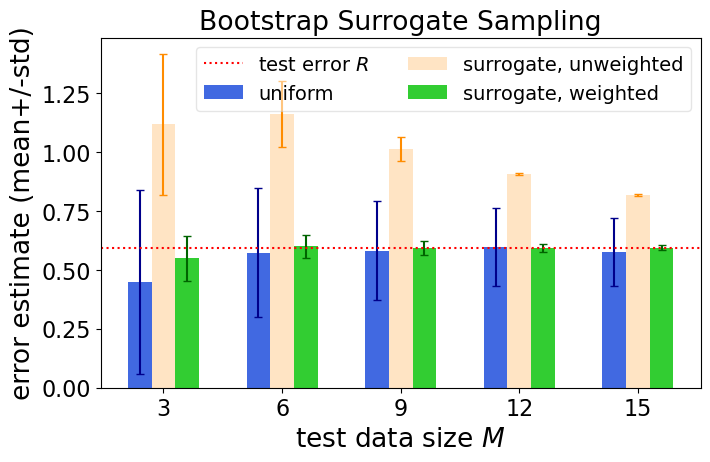

In [5]:
run_exp(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type = "boot", num_exp = 30, plot_title="Bootstrap")

### Dropout Regression Model

Trial 30 Complete [00h 00m 03s]
mean_squared_error: 0.604293167591095

Best mean_squared_error So Far: 0.28103649616241455
Total elapsed time: 00h 01m 05s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               256       
                                                                 
 lambda_10 (Lambda)          (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 352)               45408     
                                                                 
 lambda_11 (Lambda)          (None, 352)               0         
                                                                 
 dense_13 (Dense)            (None, 416)               146848    
                                                                 
 lambda_12 (Lambda)          (N

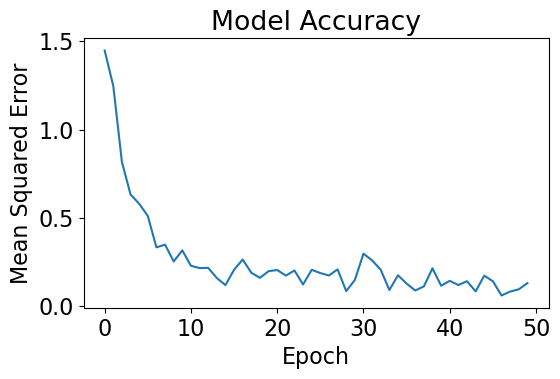

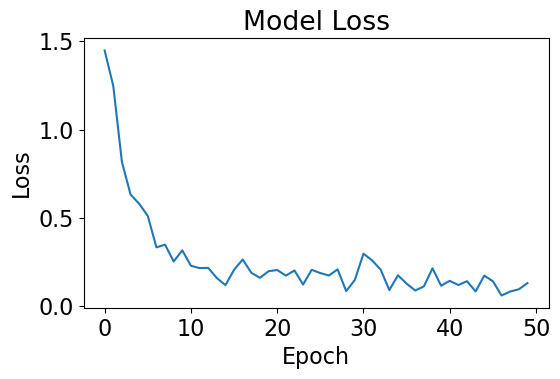

In [6]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "drop", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

1/1 [==============================] - 0s 17ms/step


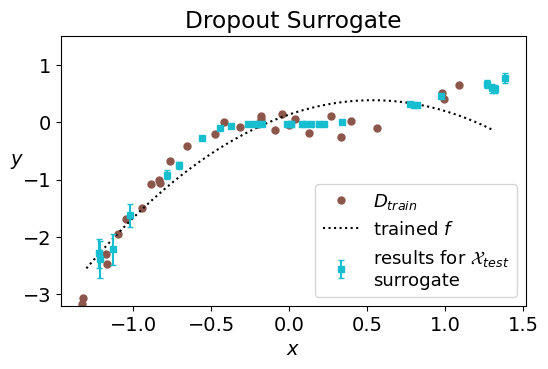

In [7]:
plot_1D(X_train, y_train, X_test, X_new, reg_evaluator, reg_learner, n_reps = 30, model_type = "drop", plot_type="Dropout")

### Dropout Surrogate Sampling

---3---
1/1 [==============================] - 0s 17ms/step
---6---
1/1 [==============================] - 0s 16ms/step
---9---
1/1 [==============================] - 0s 17ms/step
---12---
1/1 [==============================] - 0s 16ms/step
---15---
1/1 [==============================] - 0s 15ms/step


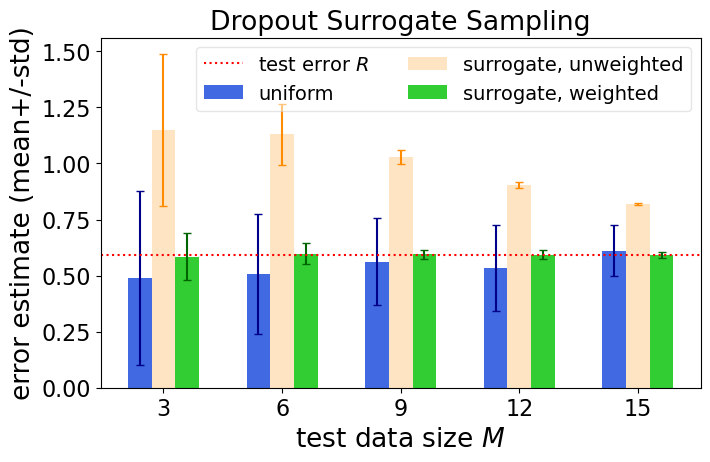

In [8]:
run_exp(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, model_type = "drop", n_reps = 30, num_exp = 30, plot_title="Dropout")

### Probabilistic Layer Regression Model

Trial 30 Complete [00h 00m 02s]
mean_squared_error: 1.041602373123169

Best mean_squared_error So Far: 0.4005221724510193
Total elapsed time: 00h 01m 13s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 192)               384       
                                                                 
 dense_8 (Dense)             (None, 288)               55584     
                                                                 
 dense_9 (Dense)             (None, 416)               120224    
                                                                 
 dense_10 (Dense)            (None, 256)               106752    
                                                                 
 dense_11 (Dense)            (None, 416)               106912    
                                                                 
 dense_12 (Dense)            (No

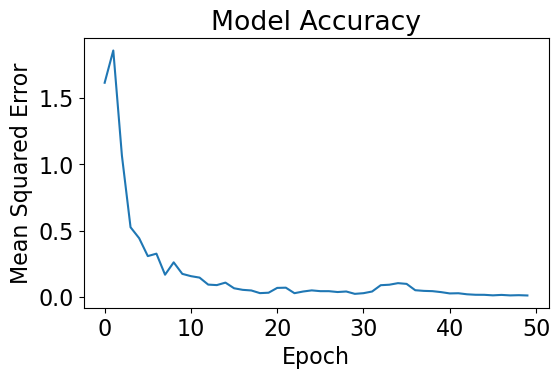

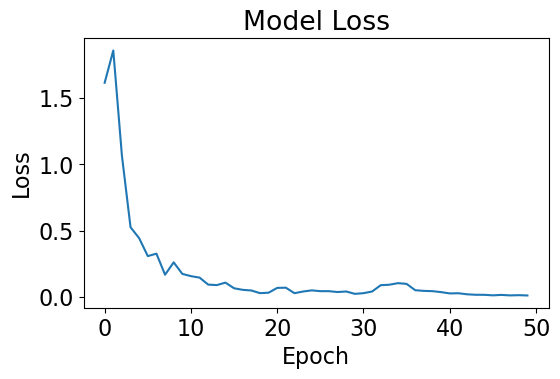

In [9]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "prob", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

1/1 [==============================] - 0s 22ms/step


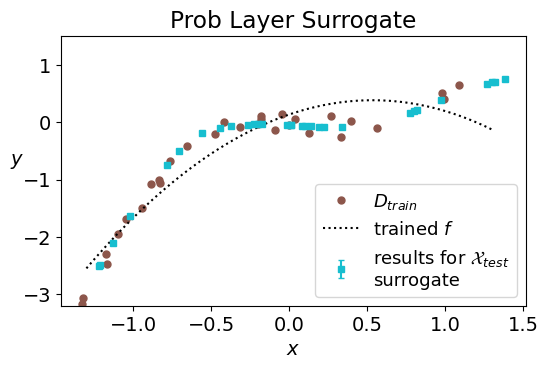

In [10]:
plot_1D(X_train, y_train, X_test, X_new, reg_evaluator, reg_learner, n_reps = 30, model_type = "prob", plot_type="Prob Layer")

### Probabilistic Layer Surrogate Sampling

---3---
1/1 [==============================] - 0s 15ms/step
---6---
1/1 [==============================] - 0s 16ms/step
---9---
1/1 [==============================] - 0s 28ms/step
---12---
1/1 [==============================] - 0s 17ms/step
---15---
1/1 [==============================] - 0s 18ms/step


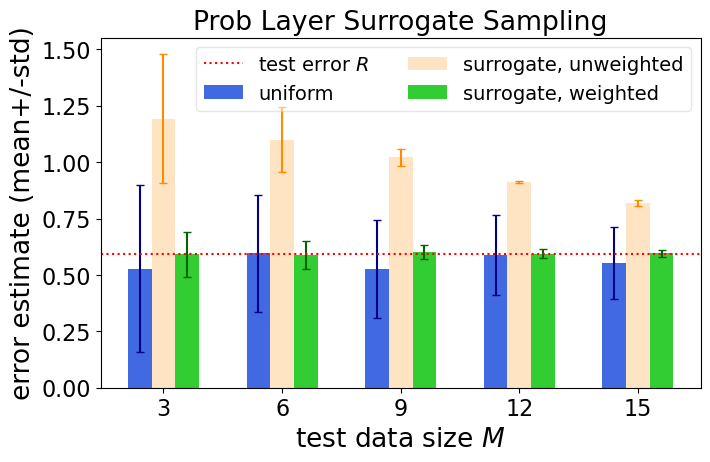

In [11]:
run_exp(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, model_type = "prob", num_exp = 30, n_reps = 30, plot_title="Prob Layer")

### Variational Inference Regression Model

In [12]:
build_vi(X_train, y_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_variational (DenseVa  (None, 2)                 12        
 riational)                                                      
                                                                 
 dense_variational_1 (Dense  (None, 2)                 18        
 Variational)                                                    
                                                                 
 distribution_lambda (Distr  ((None, 1),               0         
 ibutionLambda)               (None, 1))                         
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
reg_evaluator = build_vi(X_train, y_train)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_variational_2 (Dense  (None, 2)                 12        
 Variational)                                                    
                                                                 
 dense_variational_3 (Dense  (None, 2)                 18        
 Variational)                                                    
                                                                 
 distribution_lambda_1 (Dis  ((None, 1),               0         
 tributionLambda)             (None, 1))                         
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 17ms/step


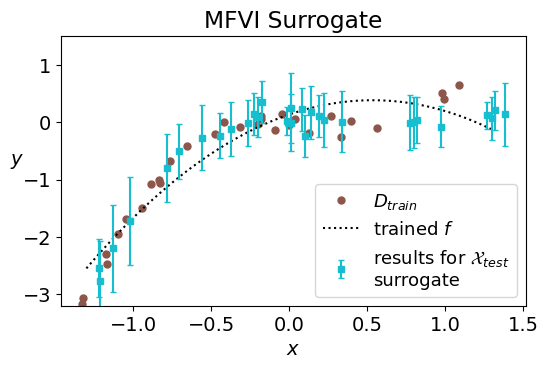

In [14]:
plot_1D(X_train, y_train, X_test, X_new, reg_evaluator, reg_learner, n_reps = 30, model_type = "vi", plot_type="MFVI")

---3---
1/1 [==============================] - 0s 16ms/step
---6---
1/1 [==============================] - 0s 16ms/step
---9---
1/1 [==============================] - 0s 33ms/step
---12---
1/1 [==============================] - 0s 11ms/step
---15---
1/1 [==============================] - 0s 9ms/step


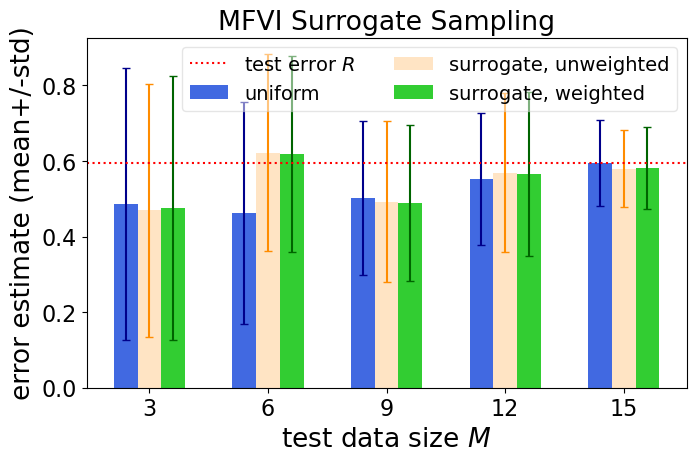

In [15]:
run_exp(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type ="vi", num_exp = 30, plot_title="MFVI")